## Prediction of Bike Rental Case Study 

#### Problem Statement: 

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

**Business Goal**

It is required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

**Data Preparation**

In the dataset that some of the variables like 'weathersit' and 'season' have values as 1, 2, 3, 4 which have specific labels associated with them (as can be seen in the data dictionary). These numeric values associated with the labels may indicate that there is some order to them - which is actually not the case. So, it is advisable to convert such feature values into categorical string values before proceeding with model building. Refer to the data dictionary to get a better understanding of all the independent variables.
 
It might be noticed the column 'yr' with two values 0 and 1 indicating the years 2018 and 2019 respectively. Since these bike-sharing systems are slowly gaining popularity, the demand for these bikes is increasing every year proving that the column 'yr' might be a good variable for prediction. 

**Model Building**

In the dataset provided, it will be noticed that there are three columns named 'casual', 'registered', and 'cnt'. The variable 'casual' indicates the number casual users who have made a rental. The variable 'registered' on the other hand shows the total number of registered users who have made a booking on a given day. Finally, the 'cnt' variable indicates the total number of bike rentals, including both casual and registered. The model should be built taking this 'cnt' as the target variable.

**Model Evaluation**

calculate the R-squared score on the test set where y_test = test data set for the target variable, y_pred = variable containing the predicted values of the target variable on the test set:

- from sklearn.metrics import r2_score
- r2_score(y_test, y_pred)

### Reading and Understanding the Data 

In [1]:
# Importing all required packages
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [2]:
bike = pd.read_csv("day.csv")

In [3]:
# Check the head of the dataset
bike.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,6,0,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,0,0,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,1,1,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,2,1,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,3,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [4]:
#Inspect the various aspects of the housing dataframe
bike.shape

(730, 16)

In [5]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
#Checking for Null values
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
bike.isnull().values.any()

False

In [9]:
bike.isnull().values.all()

False

In [10]:
#Creating a Column weekend
bike["weekend"] = bike["workingday"].apply(lambda x: 1 if x==0 else 0)

In [11]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,weekend
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,0
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0


###  Visualizing the Data 

**Visualising Numeric Variables**

If there is some multicollinearity between predictors, this is the place to check. Also to check if some predictors directly have a strong correlation with the target variable

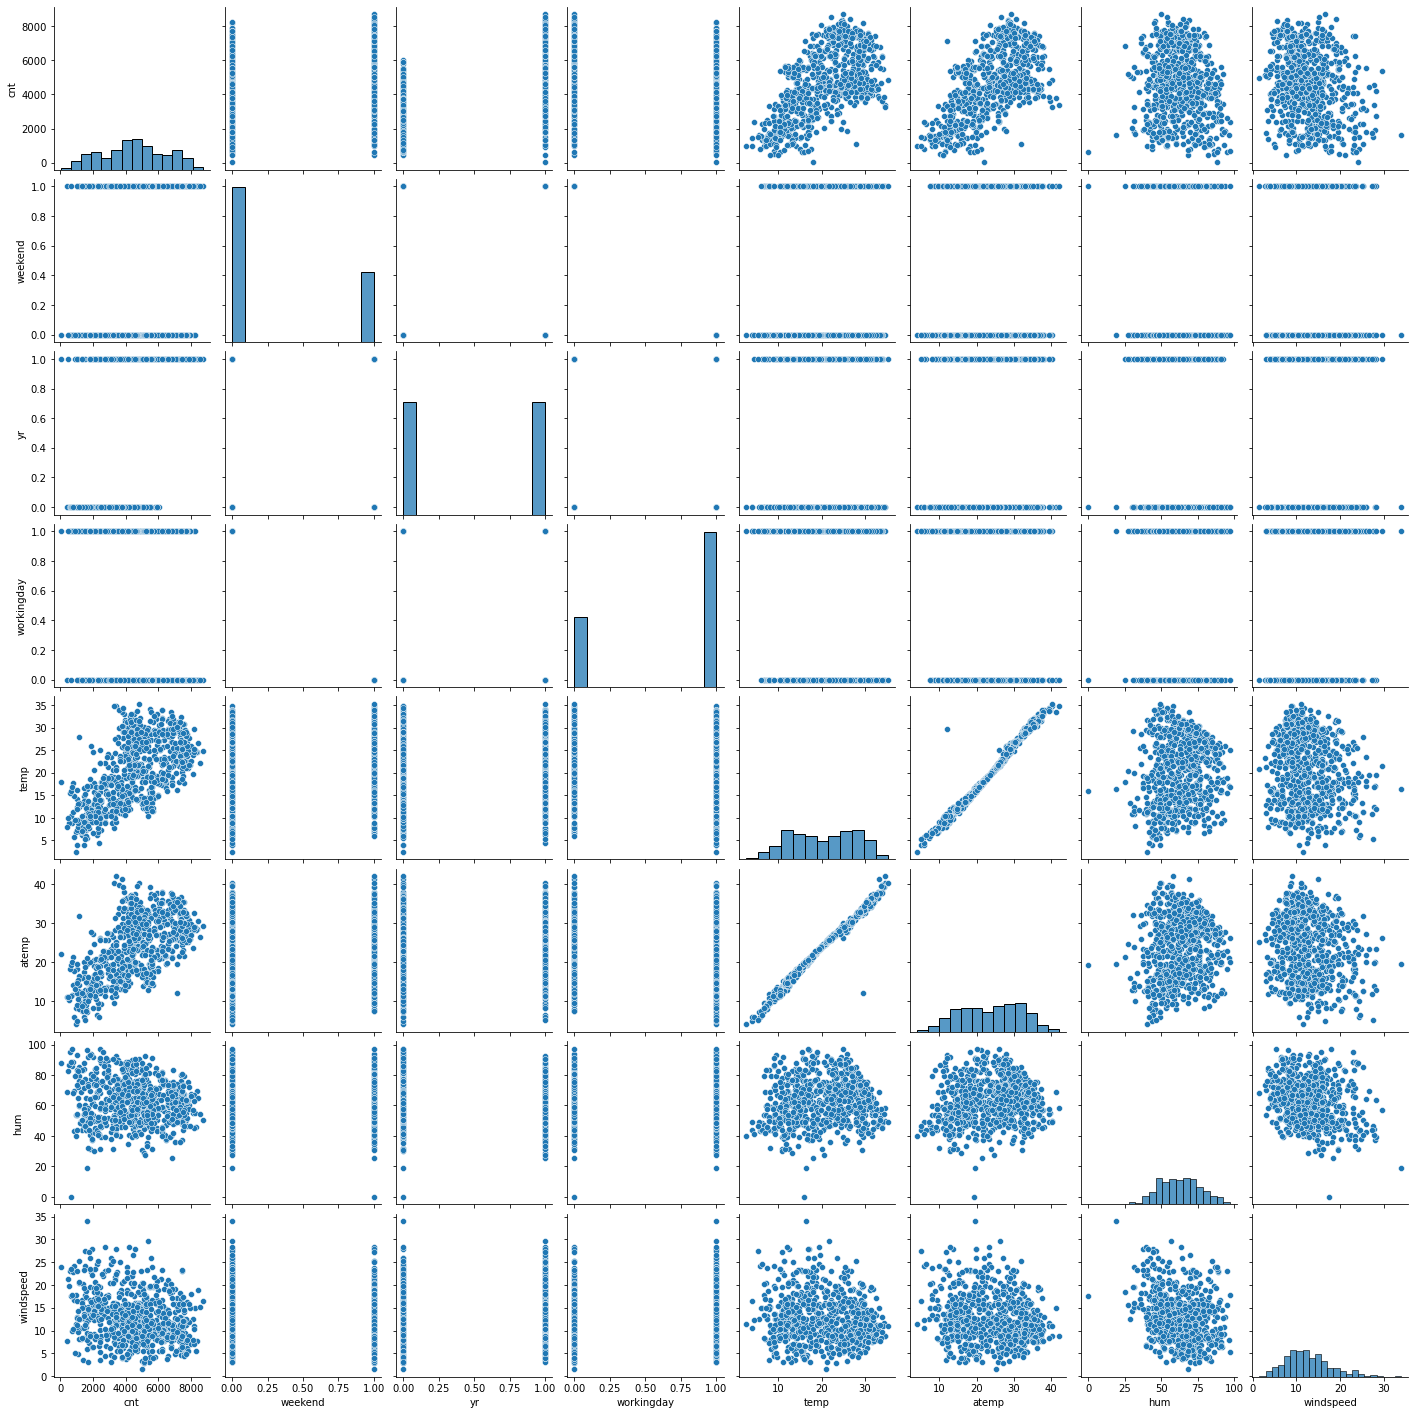

In [12]:
sns.pairplot(bike[['cnt','weekend','yr','workingday','temp','atemp','hum','windspeed']])
plt.show()

There are strong positive relationship can be observed between cnt and temp, atemp. Also cnt increased from 2018 to 2019. cnt may have some weak negative association with hum and windspeed.

temp and atemp have strong collinearity. windspeed and hum may have collinearity.

**Visualising Numeric Variables**

Also Boxplot will help recognise the data patterns of categorical variables.

`season`, `mnth` and `weathersit` are categorical variables by its significance found from Data Dictionary. But in the data given these variables have values as 1, 2, 3, 4... which have specific labels associated with them. These numeric values to be converted into categorical string values before proceeding with model building. 

In [13]:
bike['season'] = bike['season'].map({1:'season_spring',2:'season_summer',3:'season_fall',4:'season_winter'})

In [14]:
bike['season']

0      season_spring
1      season_spring
2      season_spring
3      season_spring
4      season_spring
           ...      
725    season_spring
726    season_spring
727    season_spring
728    season_spring
729    season_spring
Name: season, Length: 730, dtype: object

In [15]:
bike['weathersit'] = bike['weathersit'].map({1:'weather_clear',2:'weather_cloudy',3:'weather_lightrain',4:'weather_heavyrain'})

In [16]:
bike['weathersit']

0      weather_cloudy
1      weather_cloudy
2       weather_clear
3       weather_clear
4       weather_clear
            ...      
725    weather_cloudy
726    weather_cloudy
727    weather_cloudy
728     weather_clear
729    weather_cloudy
Name: weathersit, Length: 730, dtype: object

In [17]:
bike['mnth'] = bike['mnth'].map({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'})

In [18]:
bike['mnth']

0       January
1       January
2       January
3       January
4       January
         ...   
725    December
726    December
727    December
728    December
729    December
Name: mnth, Length: 730, dtype: object

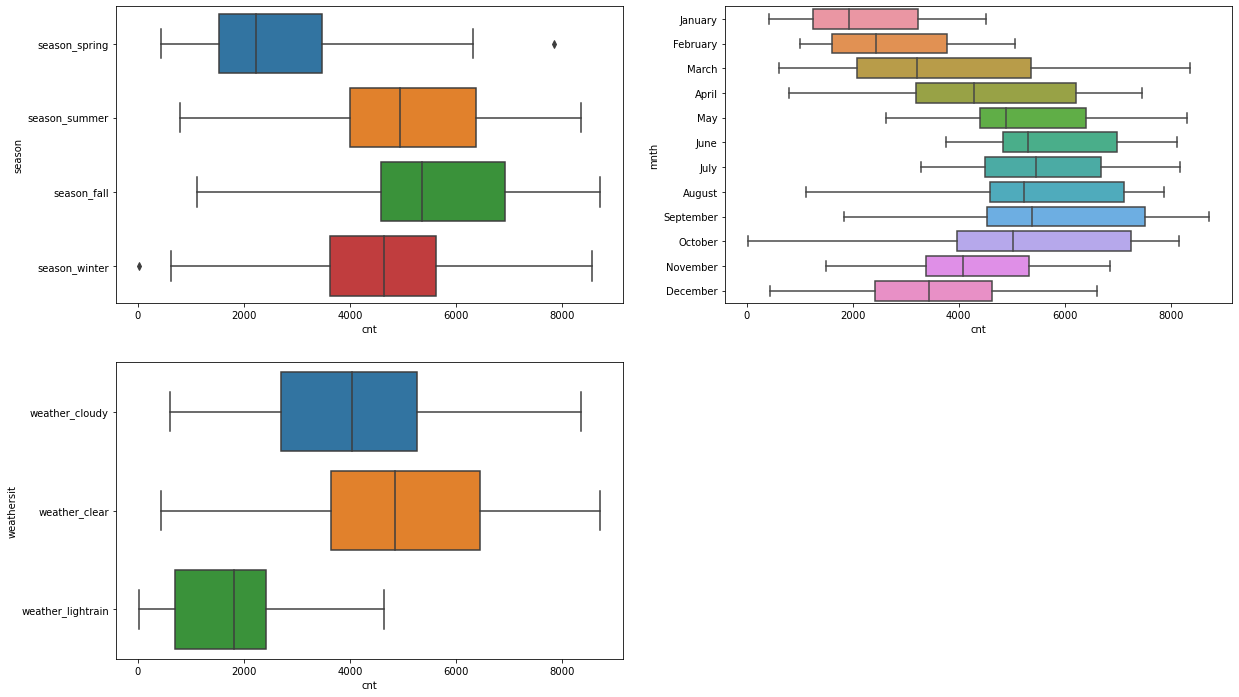

In [19]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(y = 'season', x = 'cnt', data = bike, orient = "h")
plt.subplot(2,2,2)
sns.boxplot(y = 'mnth', x = 'cnt', data = bike, orient = "h")
plt.subplot(2,2,3)
sns.boxplot(y = 'weathersit', x = 'cnt', data = bike, orient = "h")
plt.show()

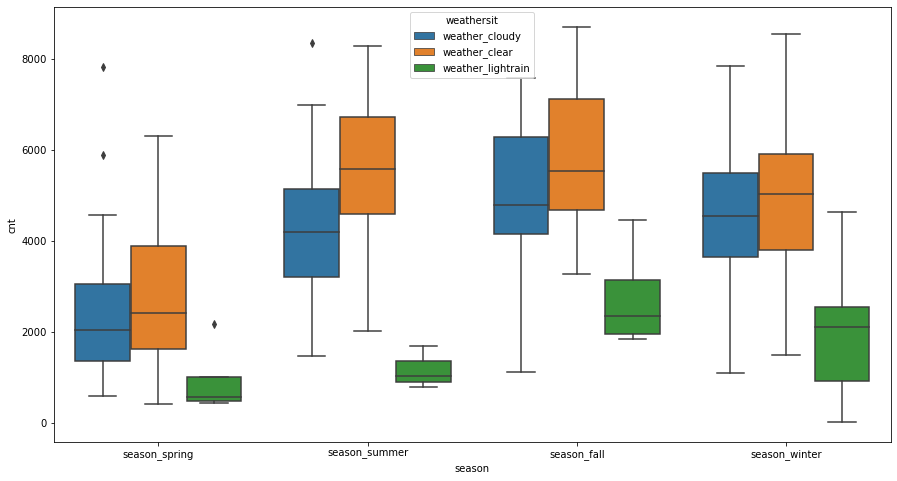

In [20]:
plt.figure(figsize = (15, 8))
sns.boxplot(x = 'season', y = 'cnt', hue = 'weathersit', data = bike)
plt.show()

Fall season has highest median while Spring has lowest demand. Also it can be seen that from June to October demand is high.
Also Clear Sky weather obviously encouraged people for going out more.

### Data Preparation

##### Dummy Variables

The variable `season` and `weathersit` has four labels and `mnth` has 12 labels. We need to convert these labels into `dummy variables`.

In [21]:
#Get the dummy variables for the feature 'season' and store it in a new variable 'feature1'
feature1 = pd.get_dummies(bike['season'])

In [22]:
feature1.head()

,season_fall,season_spring,season_summer,season_winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


Dropping `season_spring` column, as the type of season can be identified with other three columns.

In [23]:
feature1 = feature1.drop(columns='season_spring')

In [24]:
#Get the dummy variables for the feature 'weathersit' and store it in a new variable 'feature2'
feature2 = pd.get_dummies(bike['weathersit'])

In [25]:
feature2.head()

,weather_clear,weather_cloudy,weather_lightrain
0,0,1,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0


Dropping `weather_lightrain` column, as the type of weather can be identified with other two columns.

In [26]:
feature2 = feature2.drop(columns='weather_lightrain')

In [27]:
#Get the dummy variables for the feature 'mnth' and store it in a new variable 'feature3'
#Dropping `first` column, as the type of weather can be identified with other columns.
feature3 = pd.get_dummies(bike['mnth'], drop_first = True)

In [28]:
feature3.head()

,August,December,February,January,July,June,March,May,November,October,September
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [29]:
#Add result to the original dataframe
bike = pd.concat([bike, feature1, feature2, feature3], axis = 1)

In [30]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,December,February,January,July,June,March,May,November,October,September
0,1,01-01-2018,season_spring,0,January,0,1,1,weather_cloudy,14.110847,...,0,0,1,0,0,0,0,0,0,0
1,2,02-01-2018,season_spring,0,January,0,2,1,weather_cloudy,14.902598,...,0,0,1,0,0,0,0,0,0,0
2,3,03-01-2018,season_spring,0,January,0,3,1,weather_clear,8.050924,...,0,0,1,0,0,0,0,0,0,0
3,4,04-01-2018,season_spring,0,January,0,4,1,weather_clear,8.200000,...,0,0,1,0,0,0,0,0,0,0
4,5,05-01-2018,season_spring,0,January,0,5,1,weather_clear,9.305237,...,0,0,1,0,0,0,0,0,0,0


In [31]:
#Dropping 'season','mnth' and 'weathersit' as dummies has been created for these. 'casual' and 'registered' not required as our target variable is 'cnt'
bike.drop(['season','weathersit','mnth','casual','registered'], axis = 1, inplace = True)

In [32]:
bike.head()

,instant,dteday,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,...,December,February,January,July,June,March,May,November,October,September
0,1,01-01-2018,0,0,1,1,14.110847,18.18125,80.5833,10.749882,...,0,0,1,0,0,0,0,0,0,0
1,2,02-01-2018,0,0,2,1,14.902598,17.68695,69.6087,16.652113,...,0,0,1,0,0,0,0,0,0,0
2,3,03-01-2018,0,0,3,1,8.050924,9.47025,43.7273,16.636703,...,0,0,1,0,0,0,0,0,0,0
3,4,04-01-2018,0,0,4,1,8.200000,10.60610,59.0435,10.739832,...,0,0,1,0,0,0,0,0,0,0
4,5,05-01-2018,0,0,5,1,9.305237,11.46350,43.6957,12.522300,...,0,0,1,0,0,0,0,0,0,0


In [33]:
#Dropping 'instant' and 'dteday' as these columns are not needed for model building purpose
bike.drop(['instant','dteday'], axis = 1, inplace = True)

In [34]:
bike.head()

,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,weekend,...,December,February,January,July,June,March,May,November,October,September
0,0,0,1,1,14.110847,18.18125,80.5833,10.749882,985,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,2,1,14.902598,17.68695,69.6087,16.652113,801,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,3,1,8.050924,9.47025,43.7273,16.636703,1349,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,4,1,8.200000,10.60610,59.0435,10.739832,1562,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,5,1,9.305237,11.46350,43.6957,12.522300,1600,0,...,0,0,1,0,0,0,0,0,0,0


### Splitting the Data into Training and Testing Sets

In [35]:
np.random.seed(0)
df_train, df_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)

**Rescaling the Features**

In [36]:
scaler = MinMaxScaler()

In [37]:
#Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp','atemp','hum','windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [38]:
df_train.head()

,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,weekend,...,December,February,January,July,June,March,May,November,October,September
653,1,0,3,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,...,0,0,0,0,0,0,0,0,1,0
576,1,0,3,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,...,0,0,0,0,0,1,0,0,0,0
728,1,0,1,1,0.245101,0.200348,0.498067,0.663106,0.204096,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,...,0,0,0,0,0,0,0,0,0,0


In [39]:
df_train.describe()

,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,weekend,...,December,February,January,July,June,March,May,November,October,September
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,2.950980,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620,0.288235,...,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392
std,0.500429,0.157763,1.977166,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593,0.453386,...,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,3.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,5.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


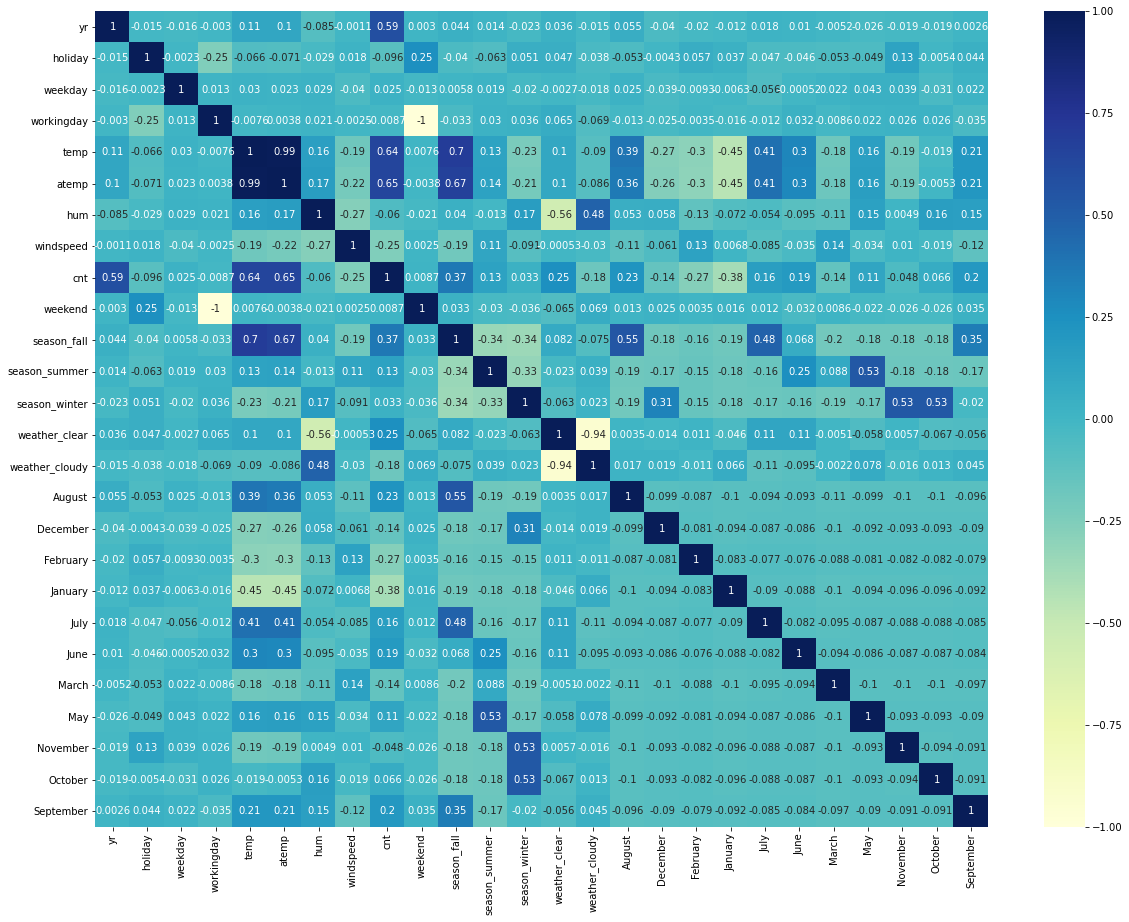

In [40]:
#checking the correlation coefficients of variables

plt.figure(figsize = (20,15))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

Target variable `cnt` seems to have some correlation with `temp` `yr` `fall` and `January`. 
First we will check pairplot for `temp` vs `cnt`

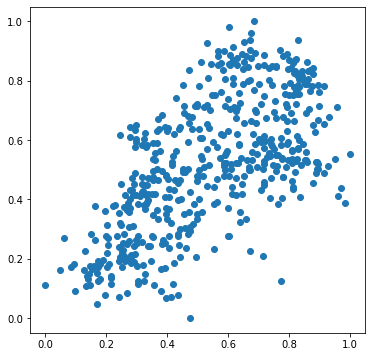

In [41]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

Starting model building with `temp` as the first variable and fitting a regression line to that.

#### Dividing into X and Y sets for the model building 

In [42]:
y_train = df_train.pop('cnt')
X_train = df_train

In [43]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

In [44]:
X_train.head()

,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,weekend,season_fall,...,December,February,January,July,June,March,May,November,October,September
653,1,0,3,1,0.509887,0.501133,0.575354,0.300794,0,0,...,0,0,0,0,0,0,0,0,1,0
576,1,0,3,1,0.815169,0.766351,0.725633,0.264686,0,1,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0,0.442393,0.438975,0.640189,0.255342,1,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,1,1,0.245101,0.200348,0.498067,0.663106,0,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0,0.395666,0.391735,0.504508,0.188475,1,0,...,0,0,0,0,0,0,0,0,0,0


### Building a linear model

Fitting a regression line through the training data using `statsmodels`.

In [45]:
#Add a constant 
X_train_lm = sm.add_constant(X_train[['temp']])

#Creating a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [46]:
#Checking the parameters obtained
lr.params

const    0.169798
temp     0.639952
dtype: float64

In [47]:
X_train_lm.head()

,const,temp
653,1.0,0.509887
576,1.0,0.815169
426,1.0,0.442393
728,1.0,0.245101
482,1.0,0.395666


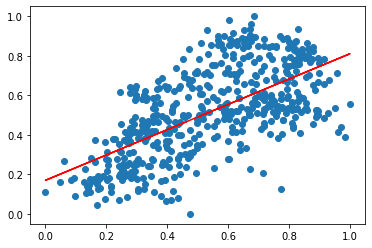

In [48]:
#Visualising the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.17 + 0.64*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [49]:
#Summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     359.1
Date:                Fri, 07 Jan 2022   Prob (F-statistic):           5.80e-61
Time:                        21:38:59   Log-Likelihood:                 174.84
No. Observations:                 510   AIC:                            -345.7
Df Residuals:                     508   BIC:                            -337.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1698      0.020      8.628      0.0

#### Adding other multiple Variables

The obtained R-squared value is `0.414`. Adding other variables better R-squared value can be achieved. F-statistic value is high and probability of F-statistic is low which is good.
p-value  of const and temp is 0 which concludes the variable is statistically significant.

In [50]:
X_train_lm = X_train[['temp','season_fall']]

In [51]:
#Building Model
X_train_lm = sm.add_constant(X_train_lm)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

const          0.133875
temp           0.744330
season_fall   -0.076711
dtype: float64

In [52]:
#Summary of the linear regression model obtained
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                     187.9
Date:                Fri, 07 Jan 2022   Prob (F-statistic):           8.59e-62
Time:                        21:38:59   Log-Likelihood:                 179.95
No. Observations:                 510   AIC:                            -353.9
Df Residuals:                     507   BIC:                            -341.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1339      0.022      5.951      

Adjusted R-squared not improved that much. F-statistics value dropped. `fall` may have multicollinearity with `temp`

**Adding different variable**

In [53]:
X_train_lm = X_train[['temp','yr']]

In [54]:
#Building Model
X_train_lm = sm.add_constant(X_train_lm)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

lr_2.params

const    0.079628
temp     0.583559
yr       0.237213
dtype: float64

In [55]:
#Summary of the linear regression model obtained
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     564.9
Date:                Fri, 07 Jan 2022   Prob (F-statistic):          9.25e-130
Time:                        21:38:59   Log-Likelihood:                 337.38
No. Observations:                 510   AIC:                            -668.8
Df Residuals:                     507   BIC:                            -656.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0796      0.015      5.331      0.0

Now the Adjusted R-squared and F-statistic definitely improved after adding the variable `yr`.

**Adding third variable**

In [56]:
X_train_lm = X_train[['temp','yr','weather_clear']]

In [57]:
#Building Model
X_train_lm = sm.add_constant(X_train_lm)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

lr_3.params

const            0.038936
temp             0.566454
yr               0.235183
weather_clear    0.081142
dtype: float64

In [58]:
#Summary of the linear regression model obtained
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     434.8
Date:                Fri, 07 Jan 2022   Prob (F-statistic):          1.31e-139
Time:                        21:38:59   Log-Likelihood:                 363.57
No. Observations:                 510   AIC:                            -719.1
Df Residuals:                     506   BIC:                            -702.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0389      0.015      2.556

Adjusted R-squared improved. p-values are also insignificant for variables means null hypothesis can be rejected (H0 : There is no correlation between target variable and predictor variable) the variables are significant. Now we will proceed for adding all the variables to the model and subsequently VIF checking.

### Adding all the variables to the model

In [59]:
# Check all the columns of the dataframe
bike.columns

Index(['yr', 'holiday', 'weekday', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'cnt', 'weekend', 'season_fall', 'season_summer',
       'season_winter', 'weather_clear', 'weather_cloudy', 'August',
       'December', 'February', 'January', 'July', 'June', 'March', 'May',
       'November', 'October', 'September'],
      dtype='object')

In [60]:
X_train_lm = sm.add_constant(X_train)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

lr_4.params

const             0.017908
yr                0.231353
holiday          -0.101908
weekday           0.002404
workingday       -0.000837
temp              0.396507
atemp             0.056731
hum              -0.161568
windspeed        -0.183355
weekend           0.018745
season_fall       0.048545
season_summer     0.088283
season_winter     0.155275
weather_clear     0.250558
weather_cloudy    0.191910
August            0.020379
December         -0.042751
February         -0.031724
January          -0.059439
July             -0.038417
June              0.000172
March             0.004156
May               0.025495
November         -0.041007
October           0.006785
September         0.085627
dtype: float64

In [61]:
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     113.7
Date:                Fri, 07 Jan 2022   Prob (F-statistic):          7.00e-182
Time:                        21:38:59   Log-Likelihood:                 520.64
No. Observations:                 510   AIC:                            -991.3
Df Residuals:                     485   BIC:                            -885.4
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0179      0.035      0.

Variables with highest and non-significant p value have to be dropped. VIF checking will confirm it.

### Checking VIF 

In [62]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
3,workingday,128.00
4,temp,66.99
5,atemp,55.80
8,weekend,51.89
9,season_fall,11.31
12,weather_clear,10.52
13,weather_cloudy,9.10
11,season_winter,8.18
22,November,6.77
10,season_summer,6.70


#### Dropping the variables one by one and updating the model

In [63]:
#first iteration of dropping variable
X = X_train.drop('workingday', 1,)

In [64]:
#Fifth Model
X_train_lm = sm.add_constant(X)

lr_5 = sm.OLS(y_train, X_train_lm).fit()

In [65]:
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     113.7
Date:                Fri, 07 Jan 2022   Prob (F-statistic):          7.00e-182
Time:                        21:38:59   Log-Likelihood:                 520.64
No. Observations:                 510   AIC:                            -991.3
Df Residuals:                     485   BIC:                            -885.4
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0171      0.053      0.

In [66]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,444.23
4,atemp,381.99
5,hum,31.42
11,weather_clear,16.91
8,season_fall,14.36
10,season_winter,10.66
12,weather_cloudy,9.81
13,August,7.16
9,season_summer,7.05
21,November,6.62


`atemp` is correlated with `temp`. so atemp should be dropped.

In [67]:
#second iteration of dropping variable
X = X.drop('atemp', 1,)

In [68]:
#Sixth Model
X_train_lm = sm.add_constant(X)

lr_6 = sm.OLS(y_train, X_train_lm).fit()

In [69]:
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     118.8
Date:                Fri, 07 Jan 2022   Prob (F-statistic):          6.89e-183
Time:                        21:38:59   Log-Likelihood:                 520.56
No. Observations:                 510   AIC:                            -993.1
Df Residuals:                     486   BIC:                            -891.5
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0171      0.053      0.

In [70]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,44.69
4,hum,31.37
10,weather_clear,16.77
7,season_fall,14.34
9,season_winter,10.65
11,weather_cloudy,9.74
8,season_summer,7.04
12,August,7.03
20,November,6.62
21,October,6.59


Dropping `season_fall` as it has high VIF 14.34 and high p-value 0.112

In [71]:
#third iteration of dropping variable
X = X.drop('season_fall', 1,)

In [72]:
#Seventh Model
X_train_lm = sm.add_constant(X)

lr_7 = sm.OLS(y_train, X_train_lm).fit()

In [73]:
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     123.7
Date:                Fri, 07 Jan 2022   Prob (F-statistic):          2.15e-183
Time:                        21:38:59   Log-Likelihood:                 519.23
No. Observations:                 510   AIC:                            -992.5
Df Residuals:                     487   BIC:                            -895.1
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0385      0.051      0.

In [74]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,42.93
4,hum,30.99
9,weather_clear,16.50
10,weather_cloudy,9.64
8,season_winter,8.06
20,October,6.54
19,November,6.53
11,August,5.33
7,season_summer,5.31
12,December,5.19


Dropping `October` as it has high VIF 6.54 and high p-value 0.854

In [75]:
#Fourth iteration of dropping variable
X = X.drop('October', 1,)

In [76]:
#Eighth Model
X_train_lm = sm.add_constant(X)

lr_8 = sm.OLS(y_train, X_train_lm).fit()

In [77]:
print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     129.8
Date:                Fri, 07 Jan 2022   Prob (F-statistic):          1.89e-184
Time:                        21:38:59   Log-Likelihood:                 519.21
No. Observations:                 510   AIC:                            -994.4
Df Residuals:                     488   BIC:                            -901.3
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0414      0.049      0.

In [78]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,42.79
4,hum,27.34
9,weather_clear,15.61
10,weather_cloudy,9.40
8,season_winter,4.68
5,windspeed,4.58
7,season_summer,3.97
11,August,3.94
15,July,3.70
14,January,3.34


Dropping `June` as it has a high non-significant p value

In [79]:
#Fifth iteration of dropping variable
X = X.drop('June', 1)

In [80]:
#Ninth Model
X_train_lm = sm.add_constant(X)

lr_9 = sm.OLS(y_train, X_train_lm).fit()

In [81]:
print(lr_9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     136.6
Date:                Fri, 07 Jan 2022   Prob (F-statistic):          1.62e-185
Time:                        21:38:59   Log-Likelihood:                 519.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     489   BIC:                            -907.5
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0416      0.049      0.

In [82]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,29.37
4,hum,26.64
9,weather_clear,15.61
10,weather_cloudy,9.40
5,windspeed,4.49
8,season_winter,4.18
7,season_summer,3.97
14,January,3.34
2,weekday,3.24
11,August,2.57


Dropping `March` as it has a high non-significant p value

In [83]:
#Sixth iteration of dropping variable
X = X.drop('March', 1)

In [84]:
#Tenth Model
X_train_lm = sm.add_constant(X)

lr_10 = sm.OLS(y_train, X_train_lm).fit()

In [85]:
print(lr_10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     143.9
Date:                Fri, 07 Jan 2022   Prob (F-statistic):          1.62e-186
Time:                        21:39:00   Log-Likelihood:                 518.99
No. Observations:                 510   AIC:                            -998.0
Df Residuals:                     490   BIC:                            -913.3
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0309      0.046      0.

In [86]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,25.12
4,hum,23.00
9,weather_clear,13.26
10,weather_cloudy,8.59
5,windspeed,4.34
7,season_summer,3.60
8,season_winter,3.43
2,weekday,3.21
11,August,2.38
14,January,2.34


Dropping `July` as it has a insignificant high p-value

In [87]:
#Seventh iteration of dropping variable
X = X.drop('July', 1)

In [88]:
#Eleventh Model
X_train_lm = sm.add_constant(X)

lr_11 = sm.OLS(y_train, X_train_lm).fit()

In [89]:
print(lr_11.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     152.0
Date:                Fri, 07 Jan 2022   Prob (F-statistic):          1.90e-187
Time:                        21:39:00   Log-Likelihood:                 518.59
No. Observations:                 510   AIC:                            -999.2
Df Residuals:                     491   BIC:                            -918.7
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0300      0.046      0.

In [90]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,22.87
3,temp,18.47
9,weather_clear,13.24
10,weather_cloudy,8.58
5,windspeed,4.32
2,weekday,3.19
8,season_winter,3.11
7,season_summer,2.92
14,January,2.34
0,yr,2.09


Dropping `weekday` as it has a high p-value

In [91]:
#Eighth iteration of dropping variable
X = X.drop('weekday', 1)

In [92]:
#Twelfth Model
X_train_lm = sm.add_constant(X)

lr_12 = sm.OLS(y_train, X_train_lm).fit()

In [93]:
print(lr_12.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     160.7
Date:                Fri, 07 Jan 2022   Prob (F-statistic):          3.05e-188
Time:                        21:39:00   Log-Likelihood:                 517.83
No. Observations:                 510   AIC:                            -999.7
Df Residuals:                     492   BIC:                            -923.4
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0390      0.045      0.

In [94]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,22.35
2,temp,18.42
8,weather_clear,13.14
9,weather_cloudy,8.57
4,windspeed,4.31
7,season_winter,3.11
6,season_summer,2.92
13,January,2.33
0,yr,2.09
15,November,1.91


Dropping `May` as it has high-p value

In [95]:
#Ninth iteration of dropping variable
X = X.drop('May', 1)

In [96]:
#Thirteenth Model
X_train_lm = sm.add_constant(X)

lr_13 = sm.OLS(y_train, X_train_lm).fit()

In [97]:
print(lr_13.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     170.3
Date:                Fri, 07 Jan 2022   Prob (F-statistic):          5.88e-189
Time:                        21:39:00   Log-Likelihood:                 516.85
No. Observations:                 510   AIC:                            -999.7
Df Residuals:                     493   BIC:                            -927.7
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0295      0.045      0.

In [98]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,22.29
2,temp,18.28
8,weather_clear,13.08
9,weather_cloudy,8.55
4,windspeed,4.25
7,season_winter,3.11
6,season_summer,2.39
13,January,2.33
0,yr,2.08
14,November,1.91


Dropping `hum` as it has high VIF value

In [99]:
#Tenth iteration of dropping variable
X = X.drop('hum', 1)

In [100]:
#Fourteenth Model
X_train_lm = sm.add_constant(X)

lr_14 = sm.OLS(y_train, X_train_lm).fit()

In [101]:
print(lr_14.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     174.8
Date:                Fri, 07 Jan 2022   Prob (F-statistic):          1.96e-186
Time:                        21:39:00   Log-Likelihood:                 508.11
No. Observations:                 510   AIC:                            -984.2
Df Residuals:                     494   BIC:                            -916.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0937      0.034     -2.

In [102]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,weather_clear,12.72
2,temp,12.12
8,weather_cloudy,7.29
3,windspeed,4.22
6,season_winter,2.66
5,season_summer,2.23
0,yr,2.07
12,January,1.94
13,November,1.90
10,December,1.65


Dropping `weather_clear` as it still has a high VIF value which may cause collinearity

In [103]:
#Eleventh iteration of dropping variable
X = X.drop('weather_clear', 1)

In [104]:
#Fifteenth Model
X_train_lm = sm.add_constant(X)

lr_15 = sm.OLS(y_train, X_train_lm).fit()

In [105]:
print(lr_15.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     137.7
Date:                Fri, 07 Jan 2022   Prob (F-statistic):          1.72e-160
Time:                        21:39:00   Log-Likelihood:                 443.50
No. Observations:                 510   AIC:                            -857.0
Df Residuals:                     495   BIC:                            -793.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1795      0.028      6.

In [106]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.25
3,windspeed,3.86
6,season_winter,2.55
0,yr,2.06
5,season_summer,2.03
12,November,1.80
8,August,1.62
7,weather_cloudy,1.56
4,weekend,1.51
9,December,1.41


Dropping `November` for high p-value

In [107]:
#Twelvth iteration of dropping variable
X = X.drop('November', 1)

In [108]:
#Sixteenth Model
X_train_lm = sm.add_constant(X)

lr_16 = sm.OLS(y_train, X_train_lm).fit()

In [109]:
print(lr_16.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     148.2
Date:                Fri, 07 Jan 2022   Prob (F-statistic):          2.51e-161
Time:                        21:39:00   Log-Likelihood:                 442.89
No. Observations:                 510   AIC:                            -857.8
Df Residuals:                     496   BIC:                            -798.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1716      0.028      6.

In [110]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.22
3,windspeed,3.79
0,yr,2.05
5,season_summer,2.02
6,season_winter,1.75
8,August,1.62
7,weather_cloudy,1.56
4,weekend,1.51
12,September,1.33
11,January,1.29


Dropping `December` with high p-value

In [111]:
#Thirteenth iteration of dropping variable
X = X.drop('December', 1)

In [112]:
#Seventeenth Model
X_train_lm = sm.add_constant(X)

lr_17 = sm.OLS(y_train, X_train_lm).fit()

In [113]:
print(lr_17.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     160.1
Date:                Fri, 07 Jan 2022   Prob (F-statistic):          4.81e-162
Time:                        21:39:00   Log-Likelihood:                 441.95
No. Observations:                 510   AIC:                            -857.9
Df Residuals:                     497   BIC:                            -802.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1569      0.025      6.

In [114]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.20
3,windspeed,3.74
0,yr,2.05
5,season_summer,2.01
6,season_winter,1.62
8,August,1.62
7,weather_cloudy,1.55
4,weekend,1.50
11,September,1.32
10,January,1.28


Dropping `January` cause correlation with temp

In [115]:
#Fourteenth iteration of dropping variable
X = X.drop('January', 1)

In [116]:
#Eighteenth Model
X_train_lm = sm.add_constant(X)

lr_18 = sm.OLS(y_train, X_train_lm).fit()

In [117]:
print(lr_18.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     173.1
Date:                Fri, 07 Jan 2022   Prob (F-statistic):          3.06e-162
Time:                        21:39:00   Log-Likelihood:                 439.73
No. Observations:                 510   AIC:                            -855.5
Df Residuals:                     498   BIC:                            -804.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1238      0.020      6.

In [118]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.14
3,windspeed,3.39
0,yr,2.00
5,season_summer,1.89
8,August,1.60
6,season_winter,1.52
4,weekend,1.49
7,weather_cloudy,1.49
10,September,1.31
9,February,1.20


Dropping `February` for high p-value

In [119]:
#Fifteenth iteration of dropping variable
X = X.drop('February', 1)

In [120]:
#Nineteenth Model
X_train_lm = sm.add_constant(X)

lr_19 = sm.OLS(y_train, X_train_lm).fit()

In [121]:
print(lr_19.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     190.8
Date:                Fri, 07 Jan 2022   Prob (F-statistic):          2.17e-163
Time:                        21:39:00   Log-Likelihood:                 439.72
No. Observations:                 510   AIC:                            -857.4
Df Residuals:                     499   BIC:                            -810.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1231      0.019      6.

In [122]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.13
3,windspeed,3.08
0,yr,1.99
5,season_summer,1.81
8,August,1.58
4,weekend,1.49
7,weather_cloudy,1.48
6,season_winter,1.46
9,September,1.30
1,holiday,1.11


Dropping `August` cause of having association with temp

In [123]:
#Sixteenth iteration of dropping variable
X = X.drop('August', 1)

In [124]:
#Twentieth Model
X_train_lm = sm.add_constant(X)

lr_20 = sm.OLS(y_train, X_train_lm).fit()

In [125]:
print(lr_20.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     207.5
Date:                Fri, 07 Jan 2022   Prob (F-statistic):          1.38e-162
Time:                        21:39:00   Log-Likelihood:                 435.06
No. Observations:                 510   AIC:                            -850.1
Df Residuals:                     500   BIC:                            -807.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1180      0.019      6.

In [126]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.79
3,windspeed,3.03
0,yr,1.99
5,season_summer,1.56
4,weekend,1.49
7,weather_cloudy,1.47
6,season_winter,1.35
8,September,1.20
1,holiday,1.11


The equation of our best fitted line is:

$ cnt = 0.118 + 0.2384  \times  yr - 0.1004  \times  holiday + 0.5489 \times temp - 0.1820 \times windspeed + 0.0201 \times weekend + 0.0878 \times season summer + 0.1178 \times season winter - 0.0684 \times weather cloudy + 0.0905 \times September $

Now all the VIFs and p-values both are within an acceptable range.

## Residual Analysis of the train data

now checking distribution of error terms

In [127]:
y_train_cnt = lr_20.predict(X_train_lm)

Text(0.5, 0, 'Errors')

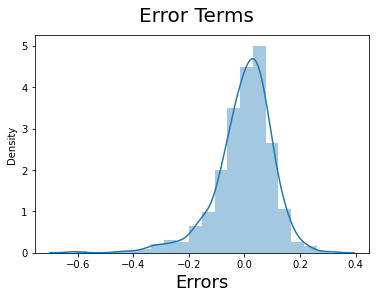

In [128]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

So the mean of error is around zero and the distribution is normally distributed.

## Making Predictions Using the Final Model 

Making the prediction on test data using the final model `lr_20`

**Applying the scaling on the test sets**

In [129]:
num_vars = ['temp','atemp','hum','windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [130]:
df_test.describe()

,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,weekend,...,December,February,January,July,June,March,May,November,October,September
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,3.100457,0.639269,0.558941,0.532991,0.638508,0.313350,0.520592,0.360731,...,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758
std,0.500722,0.188034,2.058536,0.481313,0.233698,0.217888,0.148974,0.159947,0.218435,0.481313,...,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125
min,0.000000,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,3.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,5.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,6.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [131]:
y_test = df_test.pop('cnt')
X_test = df_test

In [132]:
#adding constant variable to test dataframe
X_test_m20 = sm.add_constant(X_test)

In [133]:
X_test_m20 = X_test_m20.drop(['weekday','workingday','atemp','hum','season_fall','weather_clear','August','December','February','January','July','June','March','May','November','October'], axis = 1)

In [134]:
# Making predictions using the Twentieth model
y_pred_m20 = lr_20.predict(X_test_m20)

## Model Evaluation 

In [135]:
#calculation of the R-squared score on the test set
r2_score(y_true = y_test, y_pred = y_pred_m20)

0.7741660517109373

**R-squared score on the test set between y_true and y_pred came as 0.762 which is good**

Text(0, 0.5, 'y_pred')

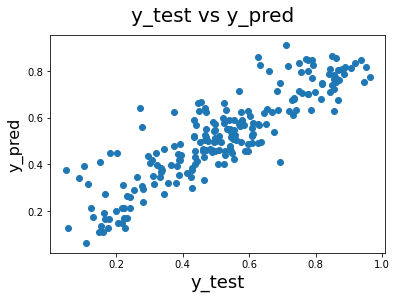

In [136]:
#Plotting y_true vs y_pred to understand the spread in scatter plot

fig = plt.figure()
plt.scatter(y_test, y_pred_m20)
fig.suptitle('y_test vs y_pred', fontsize = 20)
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16)

## Building Linear Model using Feature Selection using RFE  

In [137]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [138]:
# Running RFE with the output number of the variable equal to 10

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [139]:
# Look at columns and their ranking given by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('weekday', False, 15),
 ('workingday', False, 12),
 ('temp', True, 1),
 ('atemp', False, 9),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('weekend', False, 10),
 ('season_fall', False, 3),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('weather_clear', True, 1),
 ('weather_cloudy', True, 1),
 ('August', False, 11),
 ('December', False, 6),
 ('February', False, 7),
 ('January', False, 4),
 ('July', False, 2),
 ('June', False, 16),
 ('March', False, 14),
 ('May', False, 8),
 ('November', False, 5),
 ('October', False, 13),
 ('September', True, 1)]

In [140]:
# The 10 columns selected by RFE method

col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_summer',
       'season_winter', 'weather_clear', 'weather_cloudy', 'September'],
      dtype='object')

In [141]:
# Columns not selected by RFE method

X_train.columns[~rfe.support_]

Index(['weekday', 'workingday', 'atemp', 'weekend', 'season_fall', 'August',
       'December', 'February', 'January', 'July', 'June', 'March', 'May',
       'November', 'October'],
      dtype='object')

#### Model Building using Statsmodels 

In [142]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [143]:
# Adding a constant variable 
 
X_train_rfe = sm.add_constant(X_train_rfe)

In [144]:
# Running the linear model

lr_21 = sm.OLS(y_train,X_train_rfe).fit()   

In [145]:
print(lr_21.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     257.6
Date:                Fri, 07 Jan 2022   Prob (F-statistic):          7.80e-190
Time:                        21:39:02   Log-Likelihood:                 502.18
No. Observations:                 510   AIC:                            -982.4
Df Residuals:                     499   BIC:                            -935.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0110      0.043     -0.

In [146]:
X_train_new = X_train_rfe.drop(['const'], axis = 1)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,17.81
7,weather_clear,9.73
2,temp,8.42
8,weather_cloudy,7.31
4,windspeed,4.12
0,yr,2.06
6,season_winter,1.66
5,season_summer,1.58
9,September,1.21
1,holiday,1.04


Dropping variable `hum` as it has high VIF 17.81

In [147]:
X = X.drop(['hum'], axis=1)

In [148]:
# Adding a constant variable 
 
X_train_rfe = sm.add_constant(X)

In [149]:
# Running the linear model

lr_22 = sm.OLS(y_train,X_train_rfe).fit() 

In [150]:
print(lr_22.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     272.9
Date:                Fri, 07 Jan 2022   Prob (F-statistic):          1.37e-186
Time:                        21:39:02   Log-Likelihood:                 491.62
No. Observations:                 510   AIC:                            -963.2
Df Residuals:                     500   BIC:                            -920.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1574      0.030     -5.

In [151]:
#Checking VIF
X_train_new = X_train_rfe.drop(['const'], axis = 1)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,weather_clear,7.27
2,temp,6.67
7,weather_cloudy,4.12
3,windspeed,4.04
0,yr,2.06
4,season_summer,1.57
5,season_winter,1.45
8,September,1.20
1,holiday,1.04


Dropping variable `weather_clear` as it has high VIF 7.27

In [152]:
X = X.drop(['weather_clear'], axis=1)

In [153]:
# Adding a constant variable 
 
X_train_rfe = sm.add_constant(X)

In [154]:
# Running the linear model

lr_23 = sm.OLS(y_train,X_train_rfe).fit() 

In [155]:
print(lr_23.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     231.8
Date:                Fri, 07 Jan 2022   Prob (F-statistic):          5.28e-163
Time:                        21:39:02   Log-Likelihood:                 433.22
No. Observations:                 510   AIC:                            -848.4
Df Residuals:                     501   BIC:                            -810.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1228      0.019      6.

In [156]:
#Checking VIF
X_train_new = X_train_rfe.drop(['const'], axis = 1)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.68
3,windspeed,2.99
0,yr,1.99
4,season_summer,1.56
6,weather_cloudy,1.45
5,season_winter,1.35
7,September,1.20
1,holiday,1.03


### Residual analysis (Using RFE) 

In [157]:
y_train_cnt_rfe = lr_23.predict(X_train_rfe)

Text(0.5, 0, 'Errors')

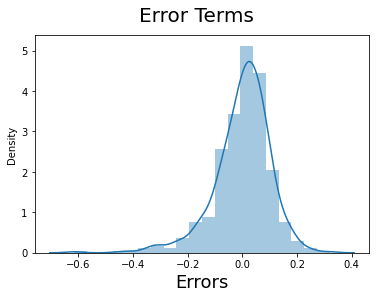

In [158]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt_rfe), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

So the mean of error is around zero and the distribution is normally distributed.

### Making predictions and Model Evaluation ( using RFE )

In [159]:
#adding constant variable to test dataframe
X_test_m23 = sm.add_constant(X_test)

In [160]:
X_test_m23 = X_test_m23.drop(['weekday','workingday','atemp','hum','season_fall','weather_clear','August','December','February','January','July','June','March','May','November','October','weekend'], axis = 1)

In [161]:
# Making predictions using the Twentythird model
y_pred_m23 = lr_23.predict(X_test_m23)

In [162]:
#calculation of the R-squared score on the test set
r2_score(y_true = y_test, y_pred = y_pred_m23)

0.7690313110260333

- All p-values of co-effs are low, hence coefficients are significant
- All VIF values are below 5
- Comparing `lr_23` with model `lr_20`, we will be accepting the `lr_20` as it has slightly higher Adjusted R-squared value which explains 78.5% variation of the data.
- R-squared score on test set for `lr_20` is 0.774 which is higher than that of `lr_23`


The equation of our best fitted line (lr_20) is:

$ cnt = 0.118 + 0.2384  \times  yr - 0.1004  \times  holiday + 0.5489 \times temp - 0.1820 \times windspeed + 0.0201 \times weekend + 0.0878 \times season summer + 0.1178 \times season winter - 0.0684 \times weather cloudy + 0.0905 \times September $

**Conclusion**

Significant variables for predicting the demand for shared bikes which are having zero p-values and should be shared with BoomBikes, US:

- `yr` : year (0: 2018, 1:2019)
- `holiday` : weather day is a holiday or not
- `temp` : temperature in Celsius
- `windspeed` : wind speed
- `weekend` : If the day is weekend or weekday
- `season_summer` : whether the season is summer or not
- `season_winter` : whether the season is winter or not
- `weather_cloudy` : If the weather situation is Mist + Cloudy or Mist + Broken clouds or Mist + Few clouds or Mist
- `Septemder` : Whether the month is September or not

The description of the behaviour of the top variables which affect the demand of the bikes most:
- `temp` :1 degree celcius  rise in temperature will increase the bike rental demand by 0.5489 unit when other predictors remain unchanged
- `yr` : With each year the demand will raise by 0.2384 unit when other predictors remain unchanged
- `season_winter` : If the season is winter, number of rental bikes will increase by 0.1178 unit when other predictors remain unchanged
- `season_summer` : If the season is summer, number of rental bikes will increase by 0.0878 unit when other predictors remain unchanged
- `holiday` : If its holiday, rental bike demand will drop by 0.1004 unit when other predictors remain unchanged
- `windspeed` : With the increase of windspeed by one unit, no. of rental bike will likely to decrease by 0.1820 unit when other regressors remain unchanged
- `September` : If the month is September, bike demand will raise by 0.0905 unit when other regressors remain unchanged
- `weather_cloudy` : When the weather is cloudy + Mist / Mist + Broken clouds / Mist + Few clouds / Mist, the demand will drop by 0.0684 unit when other regressors remain unchanged
- `weekend` : If its weekend, the number of rental bike will increase by 0.0201 unit